In [74]:
# análise do erro em regime permanante
# entrada tipo rampa

In [2]:
import numpy as np
import control
import control.matlab
import math            
import cmath
import matplotlib.pyplot as plt

In [2]:
T = 1;
Gs = control.tf(1,[1, 1, 0]);
Gz = control.c2d(Gs,T);
FTMA = Gz;

In [77]:
# importante, o erro em regime permanente é calculado a partir da função de transferência de laço aberto

aux = control.minreal(control.tf([1, -1],[1, 0],T)*FTMA);  # onde tf([1 -1],[1 0],T) = (z-1)/z = 1-z^-1
[[n]],[[d]]= control.tfdata(aux);
kv = (np.polyval(n, 1)/np.polyval(d, 1))/T   #  substituindo 1 em aux
ess = 1/kv;

print("ess = \n",ess)

1 states have been removed from the model
ess = 
 1.0


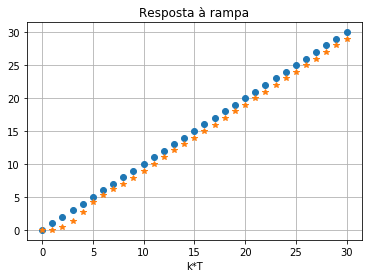

In [78]:
# erro pode ser verificado a partir da FTMF como sendo a diferença entre a entrada e a saída
# porém isto só é possível neste caso por que a realimentação é unitária
# caso não seja unitária, deve ser observado o sinal de saída do somador

FTMF = control.feedback(Gz,1);

tfinal = 30;
Kmax = int(tfinal/T+1);
t = np.linspace(0, tfinal, Kmax)
rampa = t;

y, t, x = control.matlab.lsim(FTMF, rampa, t);
plt.figure()
plt.plot(t, rampa,'o', t, y,'*')
plt.title("Resposta à rampa")
plt.xlabel("k*T")
plt.grid(True)
plt.show()

In [79]:
erro = rampa[-1]-y[-1];
print("erro = \n",erro)

erro = 
 1.00084873542459
